# Лабораторная №1. Основы предобработки данных 

Используйте файл своей группы. <br>
Загрузите его в DataFrame и ответьте на вопросы, используя инстурменты из файла Preprocessing basics.ipynb (и не только).


#### Воспросы
1. В какой шкале представлены все признаки в наборе?<br>
2. Укажите признак с наименьшей дисперсией.<br>
3. Медиана какого признака отличается для двух классов сильнее всего?<br>
4. В каком классе больше всего unskilled работников мужского рода?<br>
5. Есть ли в наборе признаки с выбросами? Какие?<br>
6. Сколько пропущенных значений в наборе? Как они обозначены <br>
7. Попытайтесь заполнить пропущенные значения минимум двумя способами.<br>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>
9. Проанализируйте взаимосвязи признаков с помощью scatter plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>
11. Какой признак(и) (если такой(ие) есть) кажется вам проблематичным? Что бы вы предложили с ним сделать?<br>
12. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>

**German Credit data** <br>
This dataset classifies people described by a set of attributes as good or bad credit risks ('class' attribute). <br>
1. checking_status -  Status of existing checking account, in Deutsche Mark.
2. duration - Duration in months
3. credit_history - Credit history (credits taken, paid back duly, delays, critical accounts)
4. purpose - Purpose of the credit (car, television,…)
5. credit_amount - Credit amount
6. savings_status - Status of savings account/bonds, in Deutsche Mark.
7. employment - Present employment, in number of years.
8. installment_commitment - Installment rate in percentage of disposable income
9. personal_status - Personal status (married, single,…) and sex
10. other_parties - Other debtors / guarantors
11. property_magnitude - Property (e.g. real estate)
12. age - Age in years
13. other_payment_plans - Other installment plans (banks, stores)
14. housing - Housing (rent, own,…)
15. existing_credits - Number of existing credits at this bank
16. job - Job
17. num_dependents - Number of people being liable to provide maintenance for
18. own_telephone - Telephone (yes,no)
19. foreign_worker - Foreign worker (yes,no)

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()


In [4]:
path='credit_3530203_80101.csv'
credit_df = pd.read_csv(path, index_col=0)

##### 1. В какой шкале представлены все признаки в наборе?
1. checking_status -  Порядковая
2. duration - Абсолютная
3. credit_history - Номинальная
4. credit_amount - Абсолютная
5. employment - Порядковая
6. personal_status - Номинальная
7. other_parties - Номинальная
8. residence_since - Абсолютная
9. property_magnitude - Номинальная
10. age - Абсолютная
11. housing - Номинальная
12. existing_credits - Абсолютная
13. job - Номинальная
14. num_dependents - Абсолютная
15. own_telephone - Номинальная
16. foreign_worker - Номинальная
17. class - Номинальная

In [52]:
credit_df.head()

,checking_status,duration,credit_history,credit_amount,employment,personal_status,other_parties,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,1169.0,>=7,male single,none,4.0,real estate,67.0,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,5951.0,1<=X<4,female div/dep/mar,none,2.0,real estate,22.0,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,2096.0,4<=X<7,male single,none,3.0,real estate,49.0,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,7882.0,4<=X<7,male single,guarantor,4.0,life insurance,45.0,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,4870.0,1<=X<4,male single,none,4.0,no known property,53.0,for free,2.0,skilled,2.0,none,yes,bad


In [53]:
credit_df.describe()

,duration,credit_amount,residence_since,age,existing_credits,num_dependents
count,501.000,501.00,501.000,501.000,501.000,501.000
mean,20.315,3192.22,2.782,35.511,1.393,1.144
std,12.103,2839.16,1.162,11.466,0.568,0.351
min,4.000,-999.00,-1.000,19.000,1.000,1.000
25%,12.000,1318.00,2.000,27.000,1.000,1.000
50%,18.000,2241.00,3.000,33.000,1.000,1.000
75%,24.000,3915.00,4.000,41.000,2.000,1.000
max,60.000,15945.00,4.000,75.000,4.000,2.000


##### 2. Укажите признак с наименьшей дисперсией.

In [54]:
credit_df.var().idxmin()

'num_dependents'

##### 3. Медиана какого признака отличается для двух классов сильнее всего?

In [55]:
# median of each attribute for two classes
medians = credit_df.groupby('class').agg(np.median)
medians

,duration,credit_amount,residence_since,age,existing_credits,num_dependents
class,,,,,,
bad,24.0,2762.0,3.0,31.0,1.0,1.0
good,15.0,2138.5,3.0,34.0,1.0,1.0


In [56]:
# compute difference between two rows in percentage
# take second row and sort values, then take the first index
abs(medians.pct_change(axis=0).iloc[1]).sort_values(ascending=False).index[0]


'duration'

##### 4. В каком классе больше всего unskilled работников мужского рода?

In [5]:
credit_df['personal_status'].unique()

array(['male single', 'female div/dep/mar', 'male div/sep',
       'male mar/wid'], dtype=object)

In [6]:
import re
male = credit_df['personal_status'].str.contains(r'(^male)')
unskilled = credit_df['job'].str.contains(r'(unskilled)')
unskilled_male = credit_df[male & unskilled]

In [9]:
bad_class = (unskilled_male['class'] == 'bad').sum()
good_class =  unskilled_male.shape[0] - bad_class
if (max(bad_class, good_class) == bad_class):
    print('bad')
else:
    print('good')

good


##### 5. Есть ли в наборе признаки с выбросами? Какие?

<AxesSubplot:xlabel='duration'>

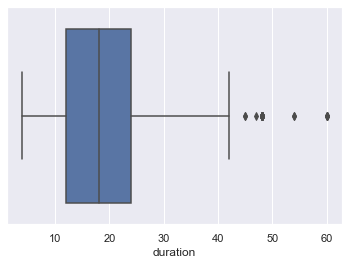

In [60]:
sns.boxplot(x='duration', data=credit_df) # выбросов нет: max = 60 мес. (5 лет)

In [18]:
# check those people
credit_df[credit_df['duration'] >= 60]

# 29th person and 332nd person have almost the same credit amount. But 29th has been employed for more than 7 years,
# and 332nd for less than 1.
# But 29th is 63 year old and seems to have no property, while 332nd does have life insurance.
# Seems to be the inliers.

,checking_status,duration,credit_history,credit_amount,employment,personal_status,other_parties,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
29,<0,60.0,delayed previously,6836.0,>=7,male single,none,4.0,no known property,63.0,own,2.0,skilled,1.0,yes,yes,bad
134,no checking,60.0,existing paid,10144.0,4<=X<7,female div/dep/mar,none,4.0,real estate,21.0,own,1.0,skilled,1.0,yes,yes,good
255,0<=X<200,60.0,delayed previously,7418.0,1<=X<4,male single,none,1.0,real estate,27.0,own,1.0,unskilled resident,1.0,none,yes,good
332,0<=X<200,60.0,existing paid,7408.0,<1,female div/dep/mar,none,2.0,life insurance,24.0,own,1.0,high qualif/self emp/mgmt,1.0,none,yes,bad
373,no checking,60.0,critical/other existing credit,13756.0,>=7,male single,none,4.0,no known property,63.0,for free,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
374,0<=X<200,60.0,all paid,14782.0,>=7,female div/dep/mar,none,4.0,no known property,60.0,for free,2.0,high qualif/self emp/mgmt,1.0,yes,yes,bad


15945.0

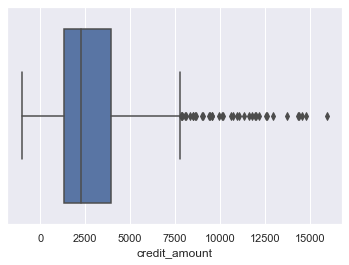

In [61]:
sns.boxplot(x='credit_amount', data=credit_df) # выбросов нет: max = 15945DEM = 707537.307141RUB
credit_df['credit_amount'].max()

<AxesSubplot:xlabel='residence_since'>

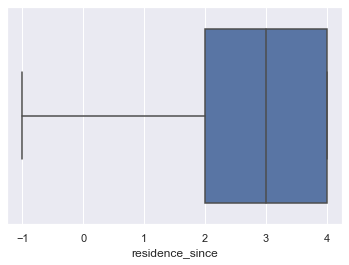

In [62]:
sns.boxplot(x='residence_since', data=credit_df) # выбросов нет

75.0

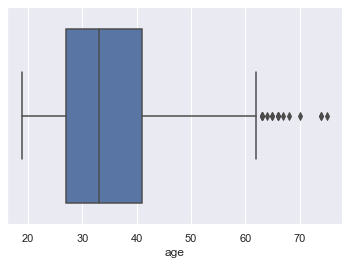

In [10]:
sns.boxplot(x='age', data=credit_df) # выбросов нет: max = 75 лет
credit_df['age'].max()

In [16]:
#check people with age higher than 63
credit_df[credit_df['age'] >= 63]

,checking_status,duration,credit_history,credit_amount,employment,personal_status,other_parties,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,1169.0,>=7,male single,none,4.0,real estate,67.0,own,2.0,skilled,1.0,yes,yes,good
29,<0,60.0,delayed previously,6836.0,>=7,male single,none,4.0,no known property,63.0,own,2.0,skilled,1.0,yes,yes,bad
75,<0,12.0,critical/other existing credit,1526.0,>=7,male single,none,4.0,no known property,66.0,for free,2.0,high qualif/self emp/mgmt,1.0,none,yes,good
123,>=200,10.0,critical/other existing credit,781.0,>=7,male single,none,4.0,no known property,63.0,for free,2.0,skilled,1.0,yes,yes,good
137,0<=X<200,12.0,existing paid,766.0,1<=X<4,male single,none,3.0,real estate,66.0,own,1.0,unskilled resident,1.0,none,yes,bad
163,0<=X<200,10.0,existing paid,7308.0,unemployed,male single,none,4.0,no known property,70.0,for free,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
179,<0,21.0,critical/other existing credit,571.0,>=7,male single,none,4.0,real estate,65.0,own,2.0,skilled,1.0,none,yes,good
186,0<=X<200,9.0,all paid,5129.0,>=7,female div/dep/mar,none,4.0,no known property,74.0,for free,1.0,high qualif/self emp/mgmt,2.0,yes,yes,bad
187,0<=X<200,16.0,critical/other existing credit,1175.0,unemployed,male single,none,3.0,car,68.0,for free,3.0,unemp/unskilled non res,1.0,yes,yes,good
213,>=200,30.0,delayed previously,1908.0,>=7,male single,none,4.0,real estate,66.0,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,bad


<AxesSubplot:xlabel='existing_credits'>

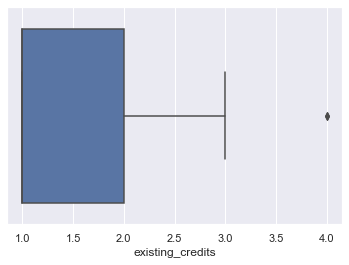

In [64]:
sns.boxplot(x='existing_credits', data=credit_df) # выбросов нет: max = 4 шт.

<AxesSubplot:xlabel='num_dependents'>

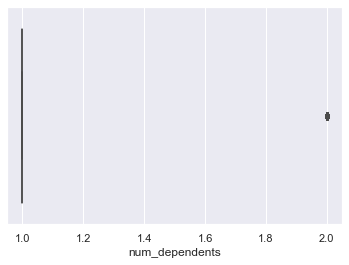

In [65]:
sns.boxplot(x='num_dependents', data=credit_df) # выбросов нет

##### 6. Сколько пропущенных значений в наборе? Как они обозначены

In [19]:
credit_df.sample(5)

,checking_status,duration,credit_history,credit_amount,employment,personal_status,other_parties,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
125,<0,12.0,critical/other existing credit,2121.0,1<=X<4,male single,none,2.0,life insurance,30.0,own,2.0,skilled,1.0,none,yes,good
252,0<=X<200,30.0,existing paid,2150.0,1<=X<4,female div/dep/mar,guarantor,2.0,no known property,24.0,own,1.0,skilled,1.0,none,yes,bad
373,no checking,60.0,critical/other existing credit,13756.0,>=7,male single,none,4.0,no known property,63.0,for free,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
287,0<=X<200,48.0,delayed previously,7582.0,unemployed,male single,none,4.0,no known property,31.0,for free,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
284,0<=X<200,24.0,critical/other existing credit,3878.0,<1,male div/sep,none,2.0,car,37.0,own,1.0,skilled,1.0,yes,yes,good


In [37]:
credit_df['checking_status'].unique()

array(['<0', '0<=X<200', 'no checking', '>=200'], dtype=object)

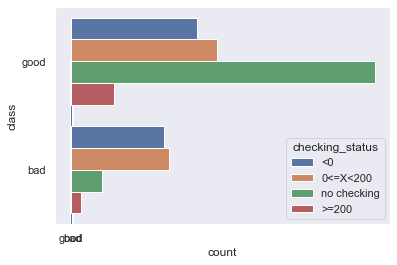

In [46]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="class", data=credit_df)
ax = sns.countplot(y="class", hue="checking_status", data=credit_df)

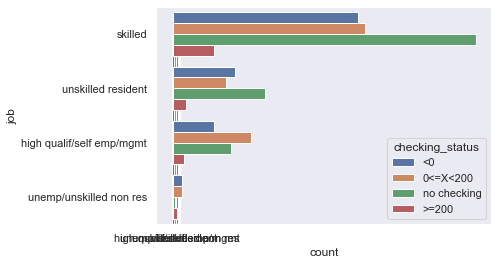

In [47]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="job", data=credit_df)
ax = sns.countplot(y="job", hue="checking_status", data=credit_df)

# skilled people from good class have no checking account

<AxesSubplot:xlabel='credit_amount', ylabel='Density'>

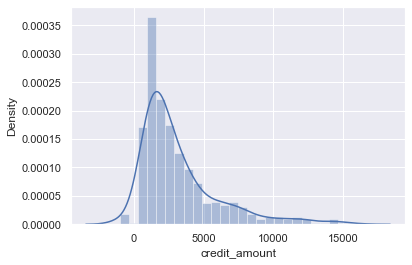

In [38]:
sns.distplot(credit_df['credit_amount'])

In [72]:
credit_df['other_parties'].unique() #none

array(['none', 'guarantor', 'co applicant'], dtype=object)

In [73]:
credit_df['residence_since'].unique() #-1

array([ 4.,  2.,  3.,  1., -1.])

In [74]:
credit_df['property_magnitude'].unique() #no known property

array(['real estate', 'life insurance', 'no known property', 'car'],
      dtype=object)

In [35]:
# everything is ok with those attributes
print('age:')
print(credit_df['age'].unique()) 
print('housing:')
print(credit_df['housing'].unique())
print('existing_credits:')
print(credit_df['existing_credits'].unique())
print('job:')
print(credit_df['job'].unique()) #unemp/unskilled non resident
print('own_telephone:')
print(credit_df['own_telephone'].unique())
print('foreign_worker:')
print(credit_df['foreign_worker'].unique())
print('class:')
print(credit_df['class'].unique())
print('num_dependents:')
print(credit_df['num_dependents'].unique())
print('personal_status:')
print(credit_df['personal_status'].unique())
print('employment:')
print(credit_df['employment'].unique())
print('duration:')
print(credit_df['duration'].unique())
print('credit_history:')
print(credit_df['credit_history'].unique())

age:
[67. 22. 49. 45. 53. 35. 61. 28. 25. 24. 60. 32. 44. 31. 48. 26. 36. 39.
 42. 34. 63. 27. 30. 57. 33. 37. 58. 23. 29. 52. 50. 46. 51. 41. 40. 66.
 47. 56. 54. 20. 21. 38. 70. 65. 74. 68. 43. 55. 64. 75. 19. 62.]
housing:
['own' 'for free' 'rent']
existing_credits:
[2. 1. 3. 4.]
job:
['skilled' 'unskilled resident' 'high qualif/self emp/mgmt'
 'unemp/unskilled non res']
own_telephone:
['yes' 'none']
foreign_worker:
['yes' 'no']
class:
['good' 'bad']
num_dependents:
[1. 2.]
personal_status:
['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']
employment:
['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1']
duration:
[ 6. 48. 12. 42. 24. 36. 30. 15.  9. 10.  7. 60. 18. 45. 11. 27.  8. 54.
 20. 14. 33. 21. 16.  4. 47. 13. 22. 39. 28.  5.]
credit_history:
['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']


In [48]:
zero_columns = set(['other_parties', 'residence_since', 'property_magnitude'])

In [49]:
missed_values = credit_df[credit_df['other_parties'] == 'none'].shape[0] + \
                credit_df[credit_df['residence_since'] == -1].shape[0] + \
                credit_df[credit_df['property_magnitude'] == 'no known property'].shape[0]
missed_values

538

##### 7. Попытайтесь заполнить пропущенные значения минимум двумя способами.

In [56]:
missed_values_list = ['none',-1,'no known property']

In [57]:
credit_df.loc[:, zero_columns] = credit_df[zero_columns].replace(missed_values_list, np.NaN)
credit_df.head(3)

,checking_status,duration,credit_history,credit_amount,employment,personal_status,other_parties,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,1169.0,>=7,male single,NaN,4.0,real estate,67.0,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,5951.0,1<=X<4,female div/dep/mar,NaN,2.0,real estate,22.0,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,2096.0,4<=X<7,male single,NaN,3.0,real estate,49.0,own,1.0,unskilled resident,2.0,none,yes,good


In [58]:
credit_df.fillna(credit_df.median(), inplace=True)
credit_df.isnull().sum()

checking_status         0
duration                0
credit_history          0
credit_amount           0
employment              0
personal_status         0
other_parties         455
residence_since         0
property_magnitude     78
age                     0
housing                 0
existing_credits        0
job                     0
num_dependents          0
own_telephone           0
foreign_worker          0
class                   0
dtype: int64

##### 8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.

<AxesSubplot:xlabel='credit_history,foreign_worker'>

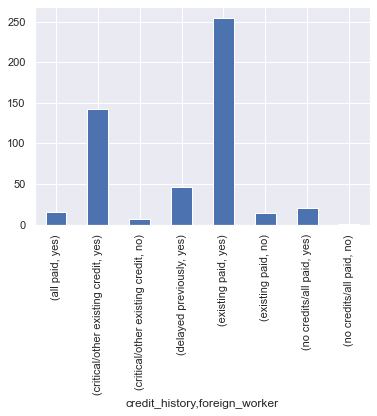

In [59]:
# Номинальный признак
credit_df.groupby('credit_history')['foreign_worker'].value_counts().plot(kind='bar')

<AxesSubplot:>

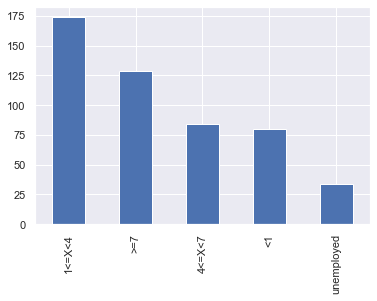

In [60]:
# Порядковый признак
credit_df['employment'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='duration', ylabel='Density'>

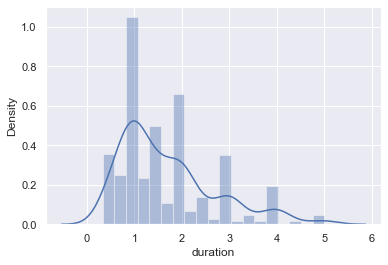

In [62]:
# Абсолютный признак
sns.distplot(credit_df['duration']/12) #in years

##### 9. Проанализируйте взаимосвязи признаков с помощью scatter plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?

In [63]:
quantitative_vars = set(credit_df.select_dtypes(include='float').columns)

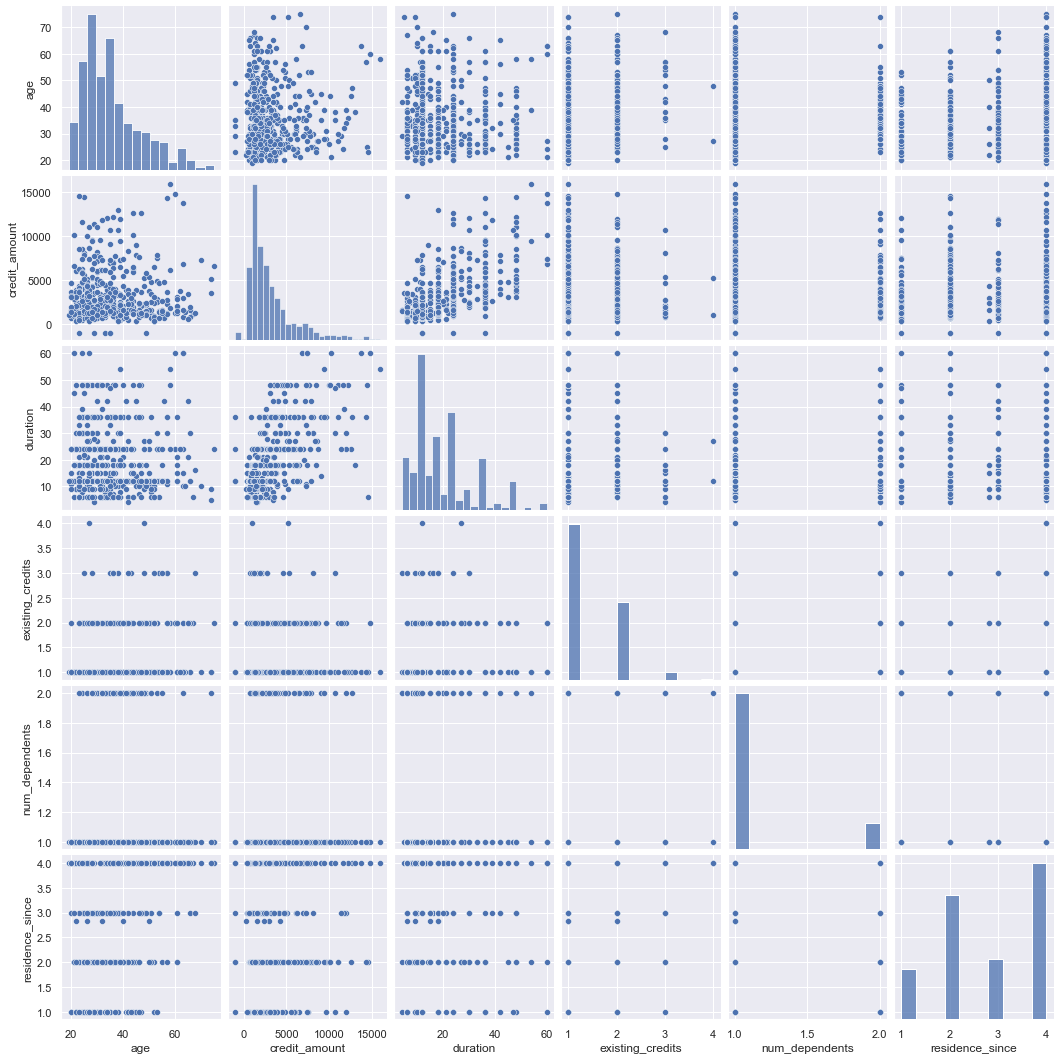

In [64]:
sns.pairplot(credit_df[quantitative_vars])

Text(0, 0.5, 'duration')

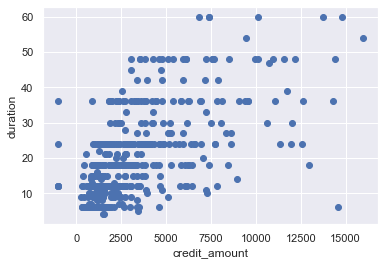

In [65]:
# the bigger the loan, the longer it takes to pay off 
plt.scatter(credit_df['credit_amount'], credit_df['duration'])
plt.xlabel('credit_amount')
plt.ylabel('duration')

Text(0, 0.5, 'age')

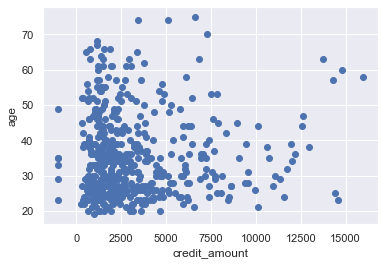

In [66]:
# the majority of clients are young and middle-aged people
# and the loan amount looks affordable
plt.scatter(credit_df['credit_amount'], credit_df['age'])
plt.xlabel('credit_amount')
plt.ylabel('age')

In [67]:
corr_matrix = credit_df[quantitative_vars].corr()
corr_matrix

,age,credit_amount,duration,existing_credits,num_dependents,residence_since
age,1.000,0.027,-0.032,0.147,0.112,0.328
credit_amount,0.027,1.000,0.604,0.024,0.029,0.033
duration,-0.032,0.604,1.000,-0.031,-0.014,0.046
existing_credits,0.147,0.024,-0.031,1.000,0.107,0.070
num_dependents,0.112,0.029,-0.014,0.107,1.000,0.077
residence_since,0.328,0.033,0.046,0.070,0.077,1.000


<AxesSubplot:>

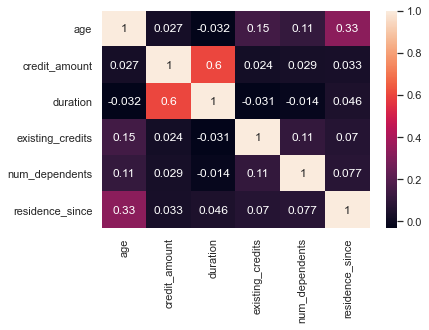

In [68]:
# Наибольшая корреляция наблюдается между credit_amount и duration
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":12})

##### 10. Какой признак(и) имеет смысл стандартизировать? Почему?

Все порядковые (checking_status, employment). Это позволит в дальнейшем при применении алгоритмов машинного обучения получать более точные результаты. Также, например, для некоторых моделей МО требуются стандартизированные признаки.

##### 11. Какой признак(и) (если такой(ие) есть) кажется вам проблематичным? Что бы вы предложили с ним сделать?

<AxesSubplot:>

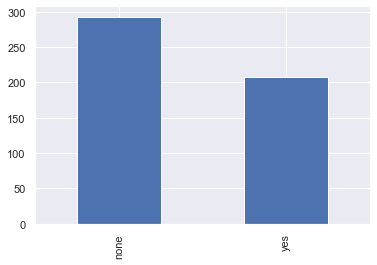

In [69]:
credit_df['own_telephone'].value_counts().plot(kind='bar')

Бинарный признак own_telephone принимает значение none. По графику none > yes. Что вводит в заблуждение: none - неизвестно, есть ли номер телефона, или неизвестно есть или нет.

##### 12. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.

Уровень образования. Можно исследовать зависимость уровня образования от вероятности выплаты клиентов кредита в срок. Возможно, что чем он выше, тем больше шансов попасть в класс 'good', потому что клиент является специалистом и будет востребован в ближашие месяцы и, следовательно, будет иметь стабильный для выплат доход.